# Image Class Project 2


## Introduction

## Choise of traking algorithm

In [ ]:
!pip install cvzone

In [ ]:
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder

# Create the color Finder object
myColorFinder = ColorFinder(True)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = False

cap = cv2.VideoCapture("Bouncing ball.mp4")

while True:
    # success, img = cap.read()
    # Display
    img = cv2.imread("ball.png")
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    # imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    imgColor = cv2.resize(imgColor, (0, 0), None, 0.4, 0.4)
    cv2.imshow('img',imgColor)
    
    # cv2.imshow("Image with Color", imgColor)
    # cv2.imshow("Video ball", imgContours)
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'sma

## Step by step

In [1]:
import numpy as np 
import cv2 as cv

In [2]:
# Read the input video 
cap = cv.VideoCapture('Bouncing ball.mp4')
  

In [3]:
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

print(f"Video Resolution: {frame_width}x{frame_height}")


Video Resolution: 1280x720


In [4]:
# take first frame of the video 
ret, frame = cap.read() 

In [6]:
# Manually select ROI
roi = cv.selectROI("Select Tracking Region", frame, fromCenter=False, showCrosshair=True)
cv.waitKey(0) 

32

In [7]:
roi

(548, 2, 240, 117)

In [8]:
x, y, width, height = roi
track_window = (x, y, width, height) 

In [9]:
 
# set up the Region of 
# Interest for tracking 
roi = frame[y:y + height, x : x + width] 

In [10]:
roi.shape

(117, 240, 3)

In [11]:
import matplotlib.pyplot as plt
def plot_array(fillter):
    plt.imshow(cv.cvtColor(fillter, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

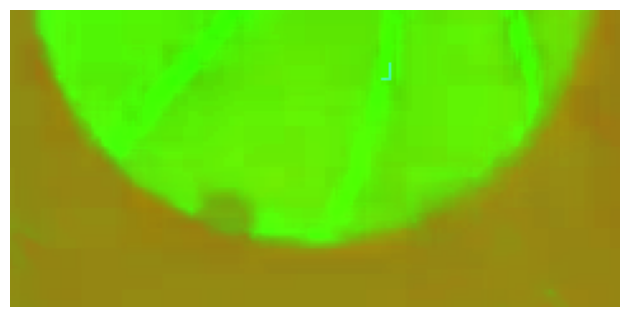

In [12]:
# convert ROI from BGR to 
# HSV format 
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV) 
plot_array(hsv_roi)  

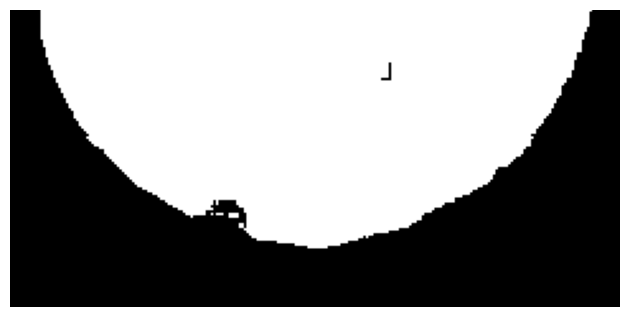

In [13]:
# perform masking operation 
# hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

mask = cv.inRange(hsv_roi, np.array((0., 176., 51.)), np.array((16., 255., 255))) 
plot_array(mask)  

In [14]:


roi_hist = cv.calcHist([hsv_roi],  
                       [0], mask, 
                       [180],  
                       [0, 180]) 

In [15]:
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX);

In [16]:
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 15, 2) 
  

In [17]:

while(1): 
    ret, frame = cap.read() 
      
    # Resize the video frames. 
    # frame = cv.resize(frame,  (720, 720), fx = 0, fy = 0, interpolation = cv.INTER_CUBIC) 
      
    cv.imshow('Original', frame) 
  
    # thresholding
    ret1, frame1 = cv.threshold(frame, 
                                180, 155, 
                                cv.THRESH_TOZERO_INV) 
  
    # convert from BGR to HSV 
    hsv = cv.cvtColor(frame1,  
                      cv.COLOR_BGR2HSV) 
  
    dst = cv.calcBackProject([hsv],  
                             [0],  
                             roi_hist,  
                             [0, 180], 1) 
      
    # Apply Camshift 
    ret2, track_window = cv.CamShift(dst, 
                                     track_window, 
                                     term_crit) 
  
    # Draw it on image 
    pts = cv.boxPoints(ret2) 
      
    # convert from floating to integer 
    pts = np.int0(pts) 
  
    # Draw Tracking window on the 
    # video frame. 
    Result = cv.polylines(frame, [pts], True, (0, 255, 255), 2) 
  
    cv.imshow('Camshift', Result) 
  
    # set ESC key as the 
    # exit button. 
    k = cv.waitKey(30) & 0xff
      
    if k == 27:
        break
  
# Release the cap object 
cap.release() 
  
# close all opened windows 
cv.destroyAllWindows() 

C:\Users\alexc\AppData\Local\Temp\ipykernel_35752\449430150.py:32: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  pts = np.int0(pts)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## Challenges